<a href="https://colab.research.google.com/github/cyprus09/DenoisingAutoencoders/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.layers import Conv2D, UpSampling2D, BatchNormalization
from keras.models import Sequential
from keras.datasets import cifar100
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = cifar100.load_data()
x_train = x_train/255
x_test = x_test/255

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
def hstackimgs(min_idx, max_idx, images):
    return np.hstack(images[min_idx:max_idx])

def sqstackimgs(length, height, images):
    return np.concatenate([hstackimgs(i*length, (i+1)*length, images) for i in range(height)], axis=0)

def sbscompare(images1, images2, length, height):
    A = sqstackimgs(length, height, images1)
    B = sqstackimgs(length, height, images2)
    C = np.ones((A.shape[0], 32, 3))
    return np.hstack((A, C, B))

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())     # 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32
model.add(BatchNormalization())     # 16x16x32
model.add(UpSampling2D())
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 up_sampling2d (UpSampling2D  (None, 32, 32, 32)       0

In [ ]:
num_epochs = 3
NOISE = 0.3     # Set to 0 for a regular (non-denoising...) autoencoder
for i in range(num_epochs):
    noise = np.random.normal(0, NOISE, x_train.shape)
    model.fit(x_train + noise, x_train, epochs=1, batch_size=100)

500/500 [==============================] - 164s 328ms/step - loss: 0.0065 - accuracy: 0.6969


10/10 [==============================] - 0s 40ms/step


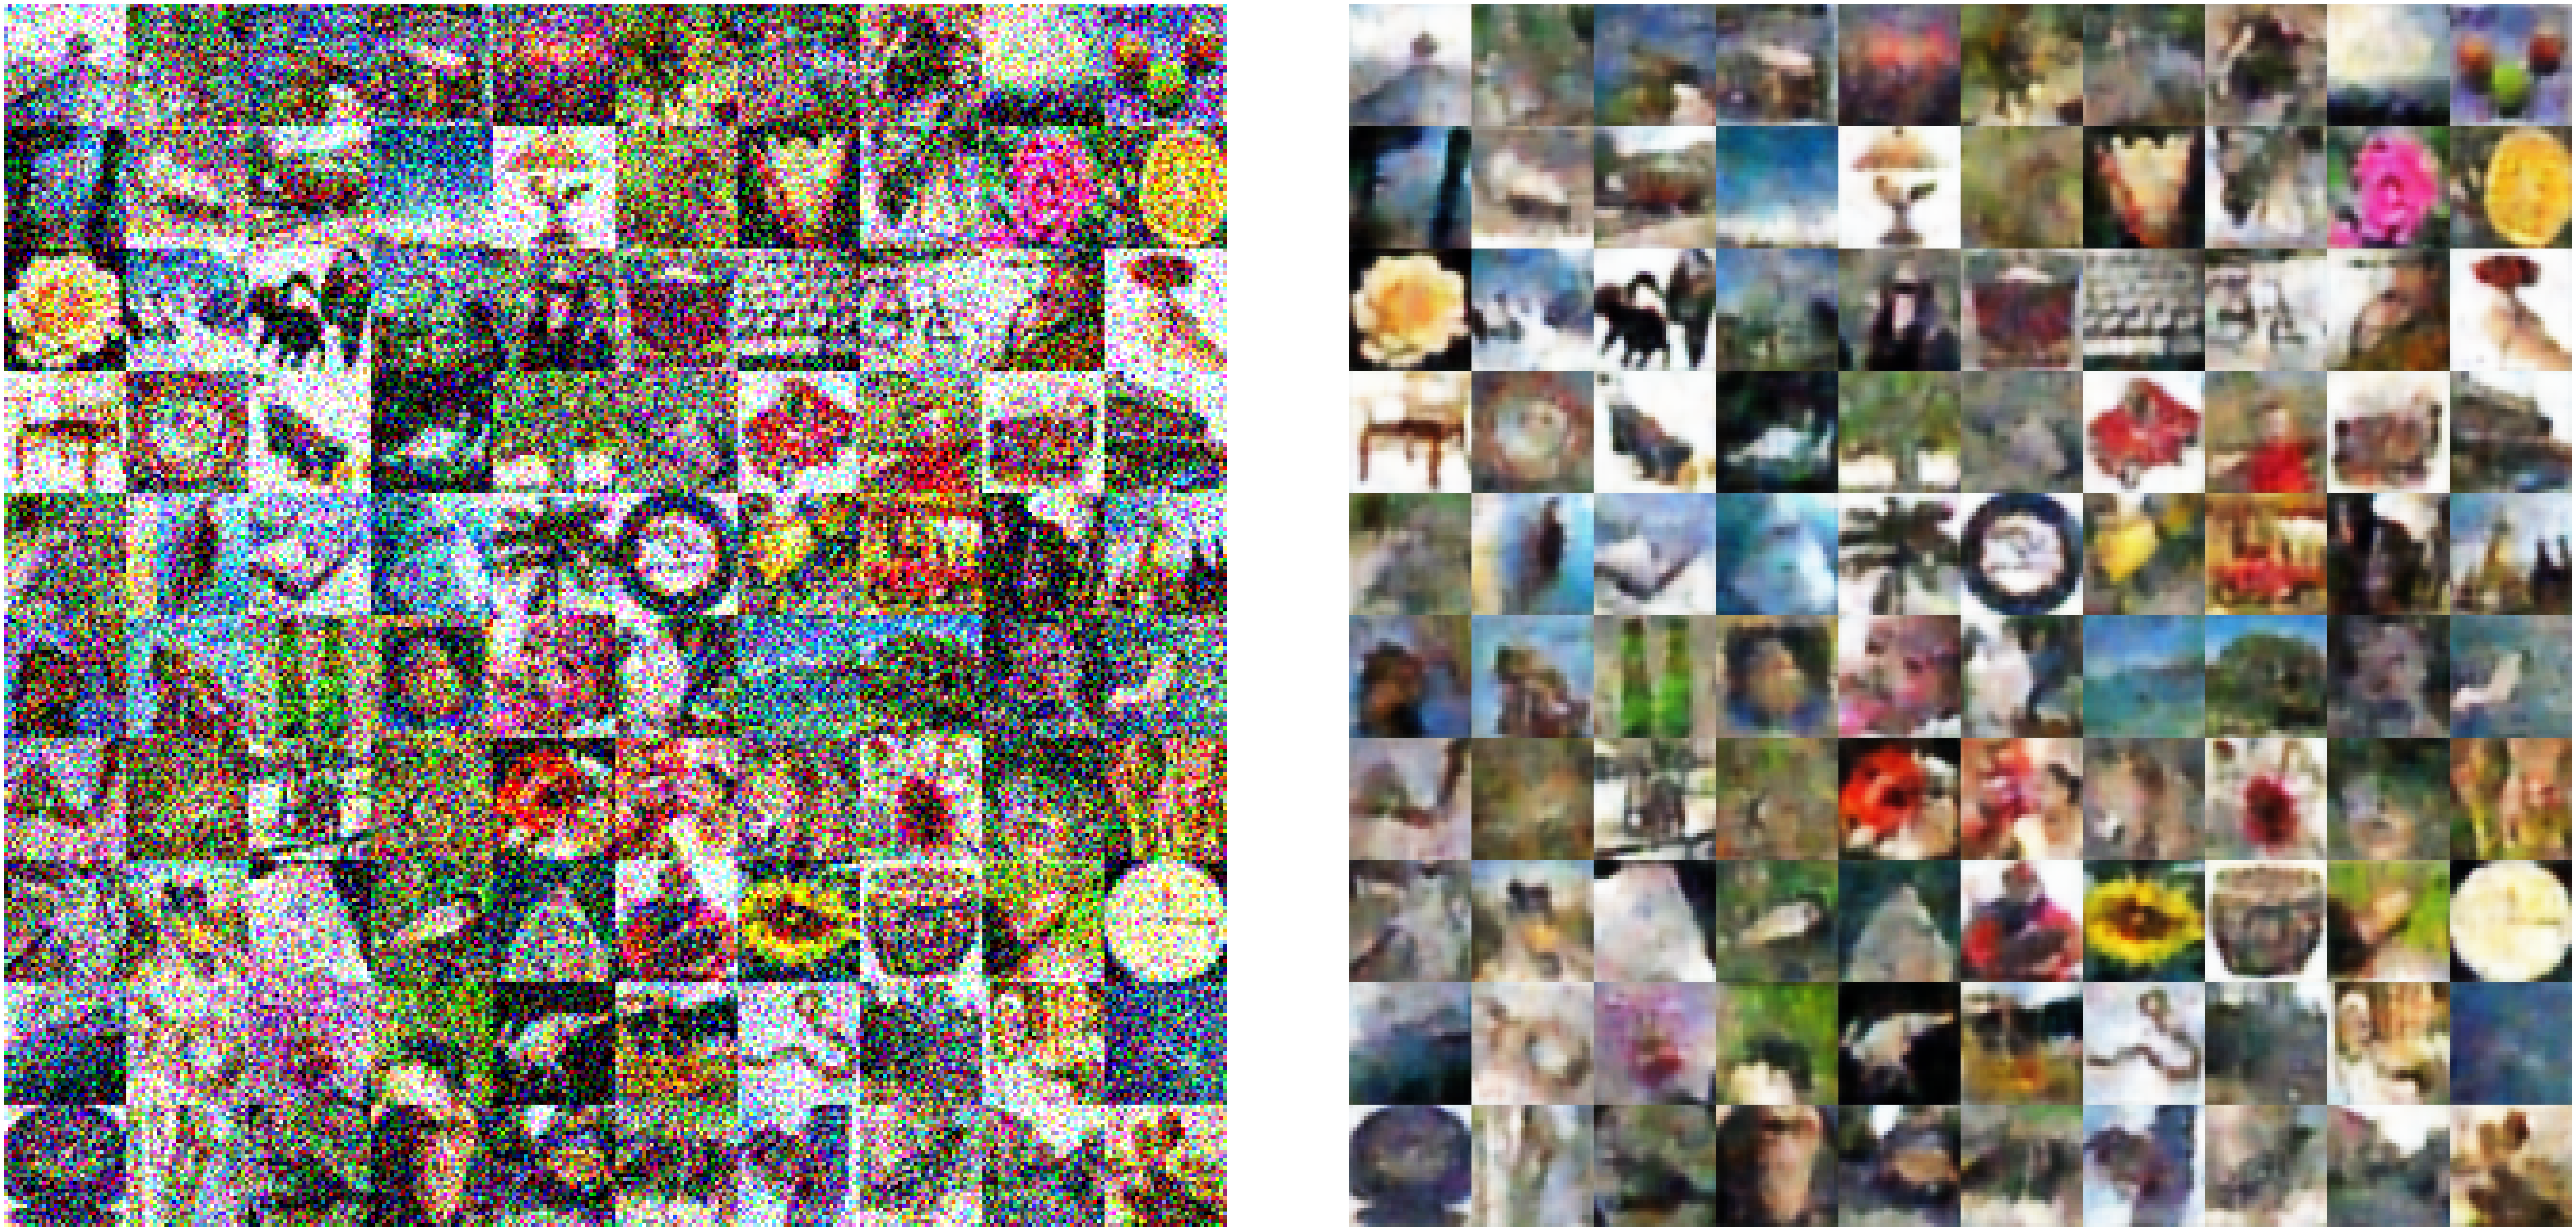

In [ ]:
x_test = x_test[:300]
noise = np.random.normal(0, NOISE, x_test.shape)
pred_imgs = model.predict(x_test + noise)

combined_images = [x_test[i] + noise[i] for i in range(len(x_test))]
plt.imshow(sbscompare(combined_images, pred_imgs, 10, 10))
plt.axis('off')
plt.rcParams["figure.figsize"] = [80, 80]
plt.show()